In [63]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
import yfinance as yf
import numpy as np
from sklearn.linear_model import LinearRegression


In [119]:
symbols = ['MSFT', 'SPY']

In [120]:
data = yf.download(symbols, '2017-8-29')['Adj Close']

[*********************100%***********************]  2 of 2 completed


In [121]:
print(data)

                  MSFT         SPY
Date                              
2017-08-29   68.641411  224.497604
2017-08-30   69.543480  225.561142
2017-08-31   70.257607  226.918121
2017-09-01   69.477699  227.239029
2017-09-05   69.167618  225.607010
...                ...         ...
2022-08-22  277.750000  413.350006
2022-08-23  276.440002  412.350006
2022-08-24  275.790009  413.670013
2022-08-25  278.850006  419.510010
2022-08-26  268.089996  405.309998

[1258 rows x 2 columns]


In [122]:
price_change = data.pct_change()
price_change['MSFT_net_position'] = price_change.MSFT.cumsum().shift().fillna(0)
price_change['SPY_net_position'] = price_change.SPY.cumsum().shift().fillna(0)
print(price_change)

                MSFT       SPY  MSFT_net_position  SPY_net_position
Date                                                               
2017-08-29       NaN       NaN           0.000000          0.000000
2017-08-30  0.013142  0.004737           0.000000          0.000000
2017-08-31  0.010269  0.006016           0.013142          0.004737
2017-09-01 -0.011101  0.001414           0.023411          0.010753
2017-09-05 -0.004463 -0.007182           0.012310          0.012168
...              ...       ...                ...               ...
2022-08-22 -0.029355 -0.020822           1.648472          0.737365
2022-08-23 -0.004716 -0.002419           1.619117          0.716542
2022-08-24 -0.002351  0.003201           1.614400          0.714123
2022-08-25  0.011095  0.014118           1.612049          0.717324
2022-08-26 -0.038587 -0.033849           1.623144          0.731442

[1258 rows x 4 columns]


In [97]:
df = price_change.drop(price_change.index[0])

In [98]:
x = np.array(df['MSFT']).reshape((-1,1))
y = np.array(df['SPY'])

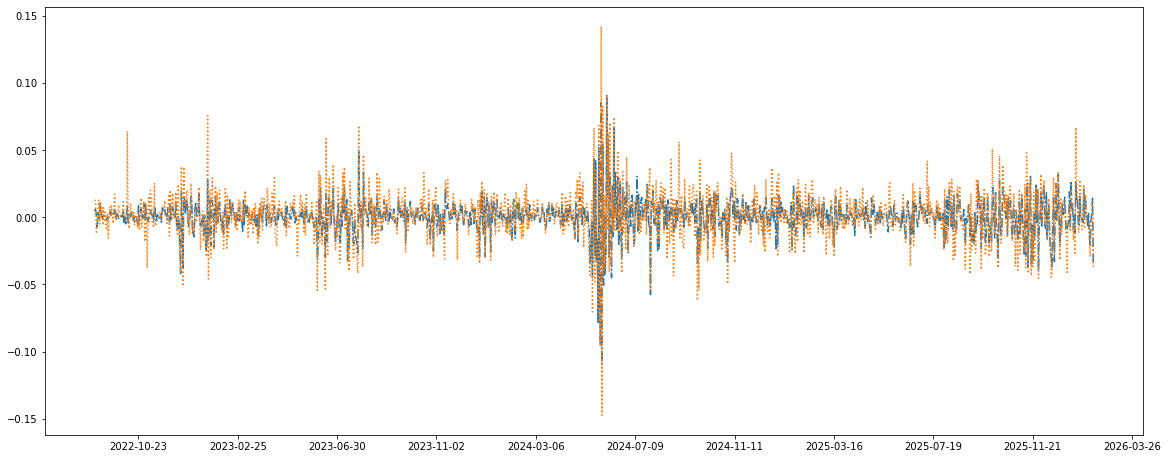

In [103]:
def cm_to_inch(value):
    return value/2.54


import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import datetime as dt

plt.figure(figsize=(cm_to_inch(50), cm_to_inch(20)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=125))
plt.plot(days,y,label= "S&P 500", linestyle="-.")
plt.plot(days,x,label = "Microsoft", linestyle=":")
plt.show()


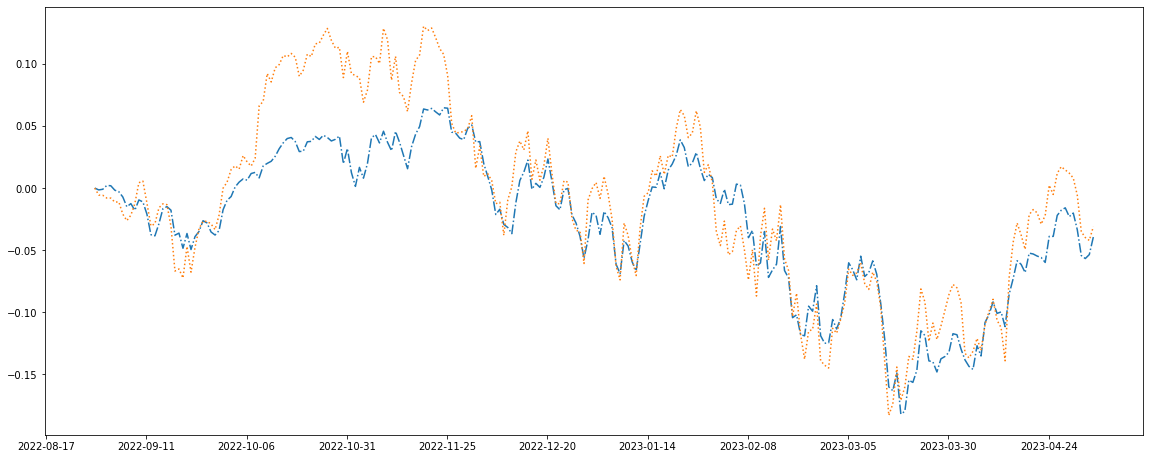

In [93]:
plt.figure(figsize=(cm_to_inch(50), cm_to_inch(20)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=25))
plt.plot(days,df['SPY_net_position'],label= "S&P 500", linestyle="-.")
plt.plot(days,df['MSFT_net_position'],label = "Microsoft", linestyle=":")
plt.show()



In [107]:
def covariance(x, y):
    # Finding the mean of the series x and y
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    # Subtracting mean from the individual elements
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    denominator = len(x)-1
    cov = numerator/denominator
    return cov


covar = covariance(df.MSFT, df.SPY)
print(covar)
variance = np.var(df.SPY)
beta = covar/variance

0.00020555744269933575


In [108]:
print('Beta: ', beta)

Beta:  1.2190819808733544
